# Modul 3: Ekualisasi dan Spesifikasi Histogram

## 1. Tampilkan histogram dari citra 1

In [4]:
import matplotlib.pyplot as plt
# library Numpy adalah alat bantu matematika yang seing digunakan dalam pengolahan citra
import numpy as np
# Merupakan library OpenCV yang digunakan untuk pengolahan citra
import cv2 as cv
# library matplotlib.pyplot yang digunakan untuk membuaut plot grafik dan visualisasi data

Text(0.5, 1.0, 'Grayscale Image')

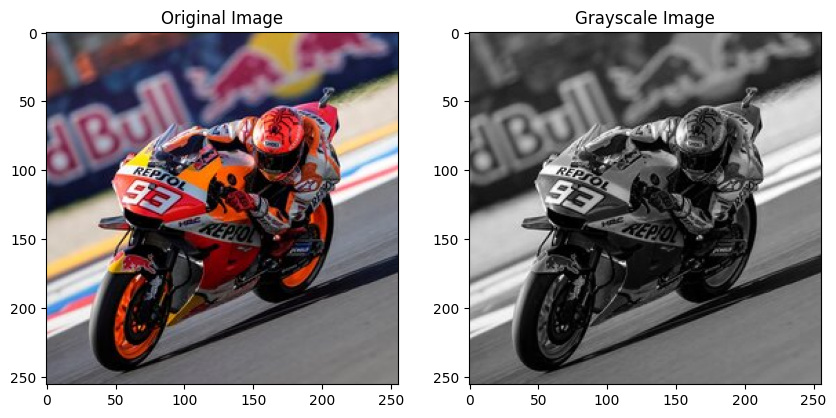

In [5]:
marc = plt.imread("marc.jpg")
#Membaca gambar "marc.jpg" menggunakan fungsi 'plt.imread()' dari package matplotlib dan menyimpannya ke dalam variabel image
grayMarc = cv.cvtColor(marc, cv.COLOR_BGR2GRAY)
#Mengubah gambar ke dalam mode grayscale dengan menggunakan fungsi cvtColor() dari package OpenCV dan menyimpannya ke dalam variabel gray_image 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
#Membuat sebuah figure yang terdiri dari 1 row dan 2 column menggunakan plt.subplots(). Mengembalikan sebuah tuple yang berisi objek figure dan array axes.
ax[0].imshow(marc)
#Menampilkan citra marc pada axes pertama (ax[0]) menggunakan metode .imshow() dari matplotlib.
ax[0].set_title('Original Image')
#Menambahkan judul pada axes pertama.
ax[1].imshow(grayMarc, cmap="gray")
#Menampilkan citra grayscale grayMarc pada axes kedua (ax[1]) menggunakan metode .imshow() dari matplotlib. Argumen cmap="gray" menunjukkan bahwa citra grayscale akan ditampilkan dalam skala keabuan.
ax[1].set_title('Grayscale Image')
#Menambahkan judul pada axes kedua.

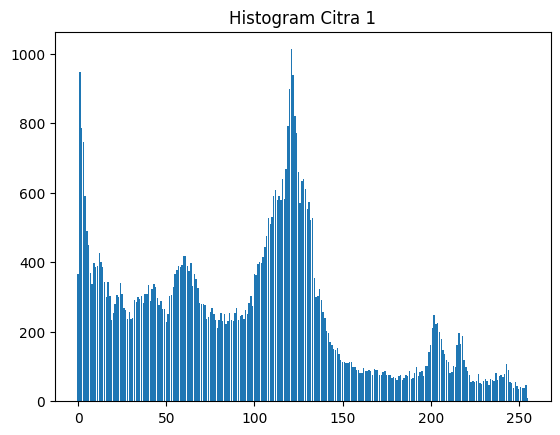

In [6]:
def imgHist(image, imagebit):
#Mendefinisikan fungsi imgHist yang memiliki dua parameter masukan, yaitu image dan imagebit.
    sumGray = np.zeros(2**imagebit)
    #Membuat array kosong sumGray dengan ukuran 2 pangkat imagebit.
    tinggi,lebar = image.shape
    #Mendapatkan ukuran citra/grayscale image image pada variabel tinggi dan lebar.
    for i in range(tinggi):
    #Melakukan perulangan pada setiap baris citra/grayscale image.
        for j in range(lebar):
        #Melakukan perulangan pada setiap kolom citra/grayscale image.
            grayValue = image[i][j]
            #Mendapatkan nilai intensitas piksel pada baris i dan kolom j dari citra/grayscale image image.
            sumGray[grayValue] += 1
            #Menambahkan nilai 1 pada indeks array sumGray yang sesuai dengan nilai intensitas piksel grayValue.
    plt.bar([i for i in range(2**imagebit)],sumGray)
    # Menampilkan histogram menggunakan fungsi bar dari library matplotlib dengan nilai intensitas piksel pada sumbu X dan jumlah kemunculan pada sumbu Y.
imgHist(grayMarc, 8)
#Memanggil fungsi imgHist dengan citra/grayscale image grayMarc dan jumlah bit 8.
plt.title("Histogram Citra 1")
#Memberikan judul pada plot histogram.
plt.show()
#Menampilkan plot histogram ke layar.

## 2. Lakukan ekualisasi histogram pada citra 1 dan tampilkan citra hasil ekualisasinya

In [7]:
def equalIMG(image, imagebit):
#Mendefinisikan fungsi equalIMG yang memiliki dua parameter masukan, yaitu image dan imagebit.
    pixNum = np.zeros(2**imagebit).astype(int)
    # Membuat array kosong pixNum dengan ukuran 2 pangkat imagebit dan tipe data integer.
    for i in range(image.shape[0]):
    # Melakukan perulangan pada setiap baris citra/grayscale image image.
        for j in range(image.shape[1]):
        #Melakukan perulangan pada setiap kolom citra/grayscale image image.
            pixNum[image[i,j]] +=1
            #Menambahkan nilai 1 pada indeks array pixNum yang sesuai dengan nilai intensitas piksel pada baris i dan kolom j dari citra/grayscale image image.

    probPx = np.zeros(2**imagebit)
    #Membuat array kosong probPx dengan ukuran 2 pangkat imagebit.
    for i in range(2**imagebit):
    #Melakukan perulangan pada setiap nilai intensitas piksel.
        probPx[i] = pixNum[i]/(image.shape[0]*image.shape[1])
        #Menghitung probabilitas kemunculan setiap nilai intensitas piksel pada citra/grayscale image image dan menyimpan hasilnya pada array probPx.

    sumPx = np.zeros(2**imagebit)
    #Membuat array kosong sumPx dengan ukuran 2 pangkat imagebit.
    for i in range (2**imagebit):
    #Melakukan perulangan pada setiap nilai intensitas piksel.
        sumPx[i] = np.sum(probPx[0:i+1])
        #Menghitung jumlah probabilitas dari nilai intensitas piksel yang lebih kecil atau sama dengan i dan menyimpan hasilnya pada array sumPx.

    pixNumAks = np.zeros(2**imagebit).astype(int)
    #Membuat array kosong pixNumAks dengan ukuran 2 pangkat imagebit dan tipe data integer.
    for i in range(2**imagebit):
    #Melakukan perulangan pada setiap nilai intensitas piksel.
        pixNumAks[i] = np.round(sumPx[i]*((2**imagebit)-1))
        #Menghitung nilai aksesor yang sesuai dengan nilai intensitas piksel i dan menyimpan hasilnya pada array pixNumAks.

    result = np.zeros(image.shape).astype(int)
    #Membuat array kosong result dengan ukuran yang sama dengan citra/grayscale image image dan tipe data integer.
    for i in range(image.shape[0]):
    #Melakukan perulangan pada setiap baris citra/grayscale image image.
        for j in range(image.shape[1]):
        #Melakukan perulangan pada setiap kolom citra/grayscale image image.
            for x in range(2**imagebit):
            #Melakukan perulangan pada setiap nilai intensitas piksel.
                if(image[i,j]==x):
                    result[i,j]=pixNumAks[x]
    return result

Text(0.5, 1.0, 'Equalisasi Image')

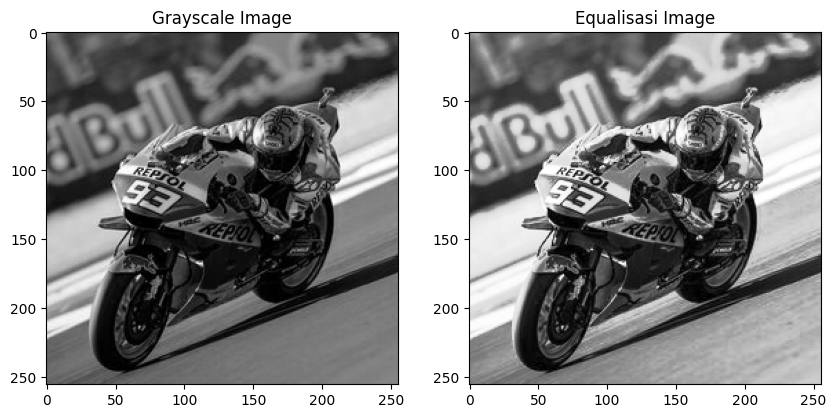

In [8]:
equalMarc = equalIMG(grayMarc,8)
#Mendefinisikan variabel equalMarc yang merupakan hasil dari fungsi equalIMG yang diberikan input grayMarc dan angka 8.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
#Mendefinisikan variabel fig dan ax untuk membuat plot berukuran 10x10 dengan 1 baris dan 2 kolom.
ax[0].imshow(grayMarc, cmap = "gray")
#Menampilkan gambar grayscale dari variabel grayMarc pada subplot pertama (kolom pertama).
ax[0].set_title('Grayscale Image')
#Memberikan judul "Grayscale Image" pada subplot pertama.
ax[1].imshow(equalMarc, cmap="gray")
#Menampilkan gambar hasil equalisasi dari variabel equalMarc pada subplot kedua (kolom kedua).
ax[1].set_title('Equalisasi Image')
#Memberikan judul "Equalisasi Image" pada subplot kedua.


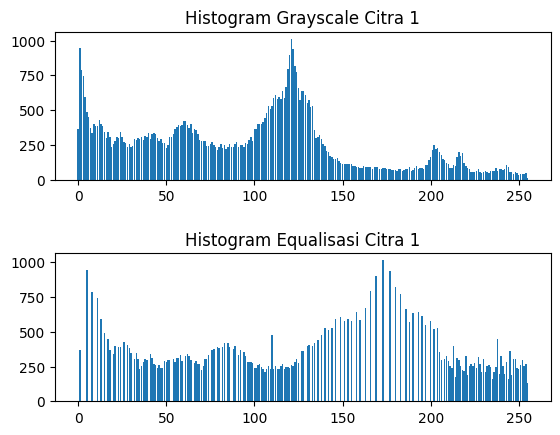

In [9]:
plt.subplot(2, 1, 1)
#membuat subplot dengan ukuran 2x1 dan menentukan bahwa subplot pertama (di posisi atas) akan digunakan.
imgHist(grayMarc, 8)
#memanggil fungsi imgHist dengan parameter citra grayscale dan jumlah level keabuan sebanyak 8.
plt.title("Histogram Grayscale Citra 1")
# memberikan judul pada subplot pertama.
plt.subplot(2, 1, 2)
#menentukan bahwa subplot kedua (di posisi bawah) akan digunakan.
imgHist(equalMarc, 8)
# memanggil fungsi imgHist dengan parameter citra grayscale hasil equalisasi dan jumlah level keabuan sebanyak 8.
plt.title("Histogram Equalisasi Citra 1")
#memberikan judul pada subplot kedua.
plt.subplots_adjust(hspace=0.5)
#menyesuaikan jarak antar subplot.
plt.show()
#menampilkan hasil plot subplot yang telah dibuat.

## 3. Lakukan spesifikasi/matching histogram pada citra 1 berdasarkan pada histogram citra 2.

In [10]:
haechan = plt.imread("haechan.jpg")
#membaca file gambar dengan nama "haechan.jpg" menggunakan fungsi plt.imread dari library Matplotlib dan menyimpannya ke dalam variabel haechan.
grayHae = cv.cvtColor(haechan, cv.COLOR_BGR2GRAY)
#cv.cvtColor(haechan, cv.COLOR_BGR2GRAY): mengubah citra haechan dari format BGR menjadi grayscale menggunakan fungsi cv.cvtColor dari library OpenCV dan menyimpannya ke dalam variabel grayHae.

In [11]:
def getSpecTarget(image, imagebit):
#mendefinisikan sebuah fungsi bernama getSpecTarget dengan dua parameter masukan, yaitu citra grayscale (image) dan jumlah bit level keabuan (imagebit).
    pixNum = np.zeros(2**imagebit).astype(int)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan jumlah kemunculan setiap level keabuan pada citra grayscale.
    for i in range(image.shape[0]):
    #melakukan iterasi pada setiap baris citra grayscale
        for j in range(image.shape[1]):
        #melakukan iterasi pada setiap kolom citra grayscale.
            pixNum[image[i,j]] +=1
            #menambahkan jumlah kemunculan level keabuan ke dalam array pixNum berdasarkan nilai level keabuan pada piksel (i,j) pada citra grayscale.
    probPx = np.zeros(2**imagebit)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan probabilitas kemunculan setiap level keabuan pada citra grayscale.
    for i in range(2**imagebit):
    #melakukan iterasi pada setiap level keabuan.    
        probPx[i] = pixNum[i]/(image.shape[0]*image.shape[1])
        #pixNum[i]/(image.shape[0]*image.shape[1]): menghitung probabilitas kemunculan level keabuan ke-i pada citra grayscale dan menyimpannya pada array probPx.
    return probPx
    #mengembalikan array probPx yang berisi probabilitas kemunculan setiap level keabuan pada citra grayscale.
targetHae = getSpecTarget(grayHae,8)
#memanggil fungsi getSpecTarget dengan citra grayscale grayHae dan jumlah bit level keabuan 8 sebagai parameter masukan, dan menyimpan hasilnya ke dalam variabel targetHae. Variabel ini akan digunakan sebagai target histogram yang akan dicapai pada proses equalisasi histogram selanjutnya.

In [12]:
def specIMG(image, specTarget, imagebit):
#mendefinisikan sebuah fungsi bernama specIMG dengan tiga parameter masukan, yaitu citra grayscale (image), target histogram (specTarget), dan jumlah bit level keabuan (imagebit).
    pixNum = np.zeros(2**imagebit).astype(int)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan jumlah kemunculan setiap level keabuan pada citra grayscale.
    for i in range(image.shape[0]):
    #melakukan iterasi pada setiap baris citra grayscale.
        for j in range(image.shape[1]):
        #melakukan iterasi pada setiap kolom citra grayscale.
            pixNum[image[i,j]] += 1
            #menambahkan jumlah kemunculan level keabuan ke dalam array pixNum berdasarkan nilai level keabuan pada piksel (i,j) pada citra grayscale.

    probPx = np.zeros(2**imagebit)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan probabilitas kemunculan setiap level keabuan pada citra grayscale.
    for i in range(2**imagebit):
    #melakukan iterasi pada setiap level keabuan.
        probPx[i] = pixNum[i]/(image.shape[0]*image.shape[1])
        #menghitung probabilitas kemunculan level keabuan ke-i pada citra grayscale dan menyimpannya pada array probPx.
    
    sumPx = np.zeros(2**imagebit)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan nilai akumulasi probabilitas kemunculan setiap level keabuan pada citra grayscale.
    targetSumPx = np.zeros(2**imagebit)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan nilai akumulasi probabilitas kemunculan setiap level keabuan pada target histogram.
    for i in range (2**imagebit):
    #melakukan iterasi pada setiap level keabuan.
        sumPx[i] = np.sum(probPx[0:i+1])
        #menghitung nilai akumulasi probabilitas kemunculan level keabuan hingga level ke-i pada citra grayscale dan menyimpannya pada array sumPx.
        targetSumPx[i] = np.sum(specTarget[0:i+1])
        #menghitung nilai akumulasi probabilitas kemunculan level keabuan hingga level ke-i pada target histogram dan menyimpannya pada array targetSumPx.
    
    pixNumAks = np.zeros(2**imagebit).astype(int)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan nilai akumulasi jumlah kemunculan setiap level keabuan pada citra grayscale.
    targetPixNumAks = np.zeros(2**imagebit).astype(int)
    #membuat sebuah array berisi 2^imagebit elemen dan diinisialisasi dengan nilai nol. Array ini akan digunakan untuk menyimpan nilai akumulasi
    for i in range(2**imagebit):
        pixNumAks[i] = np.round(sumPx[i]*((2**imagebit)-1))
        targetPixNumAks[i] = np.round(targetSumPx[i]*((2**imagebit)-1))
    
    equalisasi = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(2**imagebit):
                if(image[i,j]==x):
                    equalisasi[i,j]=pixNumAks[x]

    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
                index = np.abs(targetPixNumAks-equalisasi[i,j]).argmin()
                result[i,j]=index
    return result
specMarcbyHae = specIMG(grayMarc, targetHae, 8)

Text(0.5, 1.0, 'Spesifikasi Berdasarkan Foto Haechan')

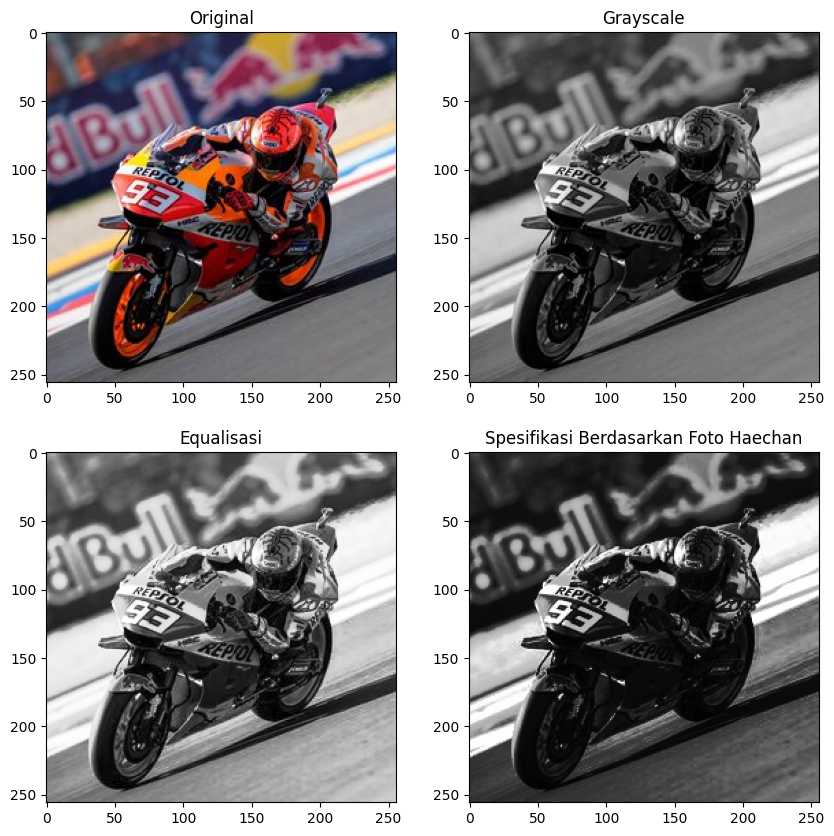

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
#membuat sebuah figure dengan 2 baris dan 2 kolom subplot, dan menentukan ukuran figure dengan figsize. Variabel fig merepresentasikan figure, dan ax merupakan sebuah array 2 dimensi yang berisi objek plot.

ax[0,0].imshow(marc)
#menampilkan citra asli pada subplot pertama (baris 0, kolom 0).
ax[0,0].set_title('Original')
#memberikan judul pada subplot pertama.
ax[0,1].imshow(grayMarc, cmap="gray")
#menampilkan citra grayscale pada subplot kedua (baris 0, kolom 1), dengan colormap "gray".
ax[0,1].set_title('Grayscale')
#memberikan judul pada subplot kedua.
ax[1,0].imshow(equalMarc, cmap="gray")
#menampilkan citra hasil equalisasi pada subplot ketiga (baris 1, kolom 0), dengan colormap "gray".
ax[1,0].set_title('Equalisasi')
#memberikan judul pada subplot ketiga.
ax[1,1].imshow(specMarcbyHae,cmap="gray")
#menampilkan citra hasil spesifikasi berdasarkan citra Haechan pada subplot keempat (baris 1, kolom 1), dengan colormap "gray".
ax[1,1].set_title('Spesifikasi Berdasarkan Foto Haechan')
#memberikan judul pada subplot keempat.

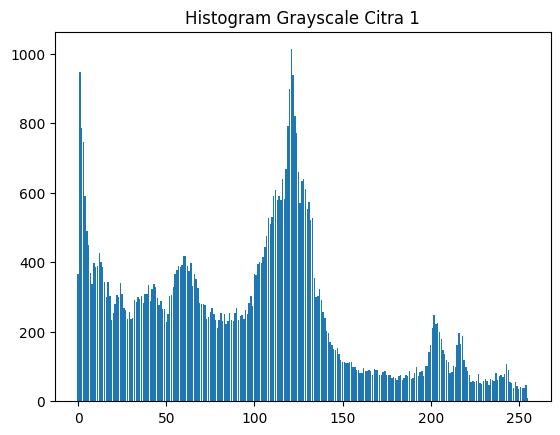

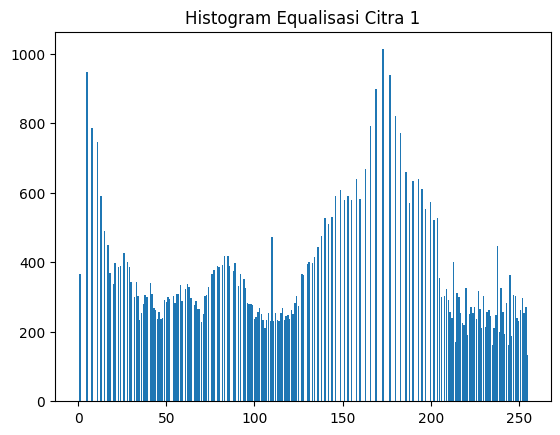

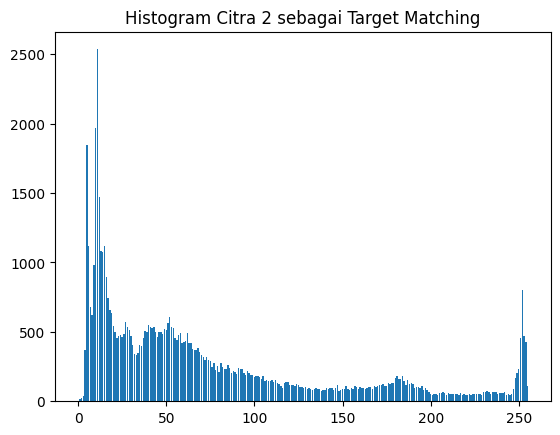

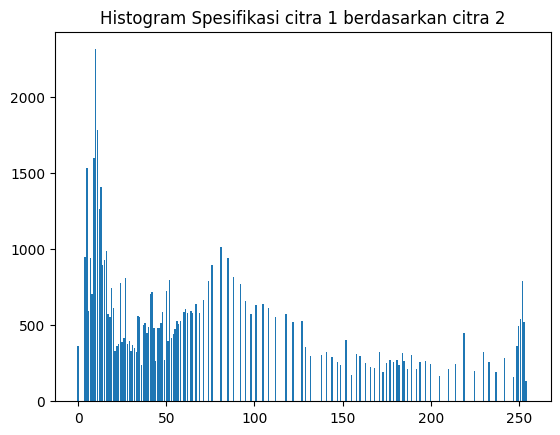

In [14]:
# plt.subplot(2, 2, 1)
imgHist(grayMarc, 8)
#memanggil fungsi imgHist() dengan argumen citra grayscale grayMarc dan jumlah level keabuan 8
plt.title("Histogram Grayscale Citra 1")
#memberikan judul pada gambar histogram yang akan ditampilkan sebagai "Histogram Grayscale Citra 1"
plt.show()
#menampilkan gambar histogram grayscale citra 1

# plt.subplot(2, 2, 2)
imgHist(equalMarc, 8)
#memanggil fungsi imgHist() dengan argumen citra hasil equalisasi equalMarc dan jumlah level keabuan 8.
plt.title("Histogram Equalisasi Citra 1")
#memberikan judul pada gambar histogram yang akan ditampilkan sebagai "Histogram Equalisasi Citra 1".
plt.show()
#menampilkan gambar histogram equalisasi citra 1.

# plt.subplot(2, 2, 3)
imgHist(grayHae, 8)
#memanggil fungsi imgHist() dengan argumen citra grayscale grayHae dan jumlah level keabuan 8.
plt.title("Histogram Citra 2 sebagai Target Matching")
#memberikan judul pada gambar histogram yang akan ditampilkan sebagai "Histogram Citra 2 sebagai Target Matching".
plt.show()
#menampilkan gambar histogram citra 2 sebagai target matching.

# plt.subplot(2, 2, 4)
imgHist(specMarcbyHae, 8)
#memanggil fungsi imgHist() dengan argumen citra hasil spesifikasi berdasarkan citra 2 specMarcbyHae dan jumlah level keabuan 8.
plt.title("Histogram Spesifikasi citra 1 berdasarkan citra 2")
#memberikan judul pada gambar histogram yang akan ditampilkan sebagai "Histogram Spesifikasi citra 1 berdasarkan citra 2".
plt.show()
#menampilkan gambar histogram hasil spesifikasi citra 1 berdasarkan citra 2.

# plt.subplots_adjust(hspace=0.1)
